#Voter Turnout Prediction

Objective: predict voter turnout for the 2014 general election

Data: voterfile from Nevada with 50,000 observations

Method: Naive Bayes

In [2]:
# import statements
import numpy as np
from scipy import linalg as la
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from pandas.io.parsers import read_csv
from matplotlib import pyplot as plt

Justification of Variables Used

I chose variables based on the presence of 3 criteria:
i) voter history,
ii) precinct turnout,
iii) age.

I excluded many of the 39 variables based on a lack of relevance, poor data quality, the possibility of causing linear dependence or some combination of the three. While the goal is predictive accuracy, I decided to favor a simple model to avoid overfitting the data. By comparing methods with simple analyses, we can choose a 'best' model and then refine it by adding more relevant data.

In [3]:
# load the voter data into a numpy ndarray type for exploratory analysis
voterdata = np.genfromtxt("voterfile.csv", dtype=[('id','i8'),('age','f4'),('party','S25'),
                                                   ('ethnicity','S25'),('income','S25'),('education','S30')],
                          delimiter=',', usecols=(0,1,2,3,6,7), skip_header=True)


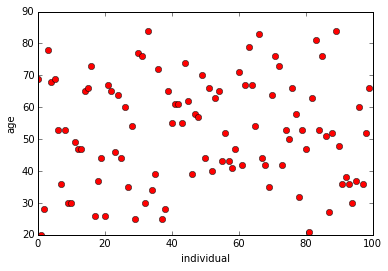


ETHNICITIES: 
['European', 'nan', 'African-American', 'Asian', 'Hispanic', 'Other', '0.0']

INCOME: 
['75k-125k', 'Unknown', '35k-75k', '200k+', '0-35k', '125k-200k', '0.0']

EDUCATION: 
['Bach Degree - Extremely Likely', 'nan', 'HS Diploma - Likely', 'HS Diploma - Extremely Likely', 'Some College - Likely', 'Bach Degree - Likely', 'Grad Degree - Extremely Likely', 'Some College -Extremely Likely', 'Less than HS Diploma - Likely', 'Grad Degree - Likely', 'Vocational Technical Degree - ', 'Less than HS Diploma - Ex Like', '0.0']


In [4]:
# visualize and explore some of the data
%matplotlib inline
plt.xlabel('individual')
plt.ylabel('age')
plt.plot(voterdata['age'][:100],'ro')
plt.show()

ethnic = []
for x in voterdata['ethnicity']:
    if ethnic.count(x) == 0:
        ethnic.append(x)
        
inc = []
for y in voterdata['income']:
    if inc.count(y) == 0:
        inc.append(y)
        
edu = []
for z in voterdata['education']:
    if edu.count(z) == 0:
        edu.append(z)

print "\nETHNICITIES: \n", ethnic
print "\nINCOME: \n", inc
print "\nEDUCATION: \n", edu

In [5]:
# divide up age into 3 arbitrary categories for visualization
young = np.array([x for x in voterdata['age'] if x < 30.0])
middle = np.array([x for x in voterdata['age'] if x < 60.0 and x >= 30.0])
old = np.array([x for x in voterdata['age'] if x >= 60.0])
print('young: %s | middle: %s | old: %s') % (len(young),len(middle),len(old))

young: 7589 | middle: 24480 | old: 17915


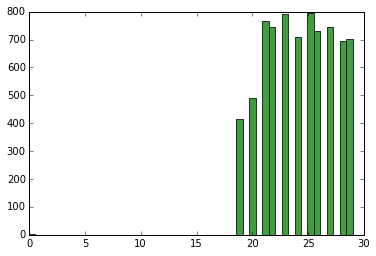

In [6]:
# young bloods
n, bins, patches = plt.hist(young,50,normed=0,facecolor='green',alpha=.75)
plt.show()

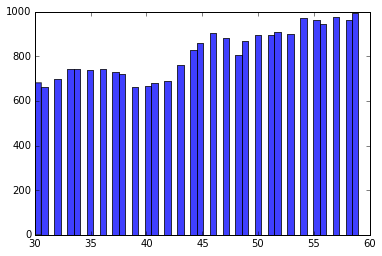

In [7]:
# middle-age folk
n, bins, patches = plt.hist(middle, 50, normed=0, facecolor='blue', alpha=.75)
plt.show()

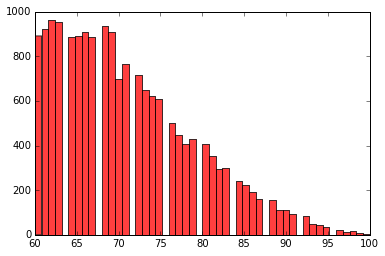

In [8]:
# old timers
n, bins, patches = plt.hist(old, 50, normed=0, facecolor='red', alpha=.75)
plt.show()

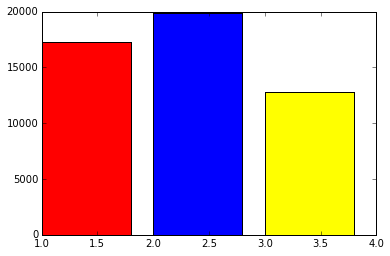

Republican: 17299 | Democrat: 19900 | Other: 12802


In [9]:
# visualize 'party'
republicans = [x for x in voterdata['party'][:] if x == "Republican"]
democrats = [x for x in voterdata['party'][:] if x == "Democratic"]
other = [x for x in voterdata['party'][:] if x != "Republican" and x != "Democratic"]

plt.bar(1, len(republicans), color='red')
plt.bar(2, len(democrats), color='blue')
plt.bar(3, len(other), color='yellow')
plt.show()
print("Republican: %s | Democrat: %s | Other: %s") % (len(republicans),len(democrats),len(other))

In [10]:
# training data from 'voterfile.csv'
train_data = np.loadtxt('voterfile.csv', delimiter=',',
                      usecols=(12,13,14,15,16,17,18,19,20,21,22,23,24,25), # 11 is 2014
                     skiprows=1)
y = np.loadtxt('voterfile.csv', delimiter=',', usecols=(0,11), skiprows=1)

In [11]:
# Multinomial Naive Bayes implementation
vote = MultinomialNB()
vote.fit(train_data,y[:,1])

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [12]:
turnout = vote.predict(train_data)
probabilities = vote.predict_proba(train_data)[:,0]
# writing the predictions to a new file
outfile = open('predictions.csv','w')
for x in turnout:
    outfile.write(str(x) + ',')
for y in probabilities:
    outfile.write(str(y))

outfile.close()


Final Thoughts:

I started the project by exploring the data. I visualized most of the variables and computed some key statistics. After I got a feel for the data and its character, I began to document some of the more interesting trends that I saw. I began developing several different models and looking into the relative advantages of each model. The algorithms I intended to implement and compare were the Multinomial Naive Bayes, Support Vector Machines (SVM), Gradient Boosted Regression Trees (GBRT), and standard Logistic Regression. To test the predictive power of each variable, I intended to use Ordinary Least Squares and compare that with a Singular Value Decomposition. I am confident that this would have produced strong results.

I learned from this project that more time should be allocated to checking and cleaning the data before models are built. I developed some interesting models but in the end, I was unable to work with the data enough to produce the results I wanted. My final predictions are written to a file called "predictions.csv" which will be created when the program is run. The first column contains the prediction for voter turnout on the interval [0,1]. The second column is the probability of that outcome.

Thank you again for this opportunity to dabble a little in some real data.

--Derek Miller